# Data Scraping 2 - Crawling and NLP

1. Scraping complex pages (navigation),
    - findNext() / findAllNext() - finds next tag(s) with their content (text and subtags)
    - findPrevious() / findAllPrevious() - finds previous tag(s) with their content (text and subtags)
    - findNextSibling() / findNextSiblings() - finds next sibling tag(s) (not child or parent)
    - findParent() / findParents() - finds Parent(s)
    - findChild() / findChildren() - finds Child(ren)
2. Scraping multiple pages,
    - Method 1: understand link structure and create a list of all links
    - Method 2: follow links under the Next page buttons or similar
3. NLP with NLTK,
    - nltk.FreqDist() - build word and frequency key value pairs
    - plot(5, cumulative=False) - plot the most popular 5 words
    - PorterStemmer()  - stem the word (leave only the root/base)
    - stopwords.words('english') - get a list of English stopwords
4. NLP with TextBlob.
    - TextBlob() - convert the string object type
    - Word() - convert the string object type (used for Word only, not sentences)
    - sentiment - estimate sentiment polarity [-1,1] and subjectivity [0,1]
    - sentences - tokenize into sentences
    - words - tokenize into words
    - definitions - provides the word's definitions
    - tags - creates tuples of words and parts of speeches
    - singularize() - convert a word to singular form
    - pluralize() - convert a word to plural form
    - lemmatize() - lemmatizes, i.e. returns the base form by usually removing endings
    - spellcheck() - provides the probability of being correct, and other probable options, if available
    - correct() - outputs the element from the above list with highest probability
    - ngrams(n=) - develops n grams fromthe given TextBlob() sentence
    - detect_language() - detect the language of the input string (TextBlob object)
    - translate(from_lang="",to="") - translates the TextBlob object from a given language to another

In [1]:
#scraping
import time
import requests
from pprint import pprint
from bs4 import BeautifulSoup

#nltk
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
#nltk.download('popular', halt_on_error=False)

#textblob
from textblob import TextBlob, Word

In [2]:
def get_quotes(url):
    response = requests.get(url)
    page = response.content
    page = BeautifulSoup(page,"html.parser")
    hashtags = [i.get_text() for i in page.find_all("span",class_='text')]
    return hashtags

In [3]:
#Method 1
base_url = "http://quotes.toscrape.com/page/"
urls = [base_url+str(i)+"/" for i in range(1,11)] #generate all page urls
all_quotes = []
for i in urls:
    all_quotes.append(get_quotes(i))
    time.sleep(5) #to make the crawler wait for 5 seconds

In [4]:
#Method 2
base = "http://quotes.toscrape.com"
all_quotes=[]
url = base
while True: #loop infinitely
    response = requests.get(url)
    page = response.content
    page = BeautifulSoup(page,"html.parser")
    quotes = [i.get_text() for i in page.find_all("span",class_="text")]
    all_quotes.append(quotes)
    our_li = page.find_all("li",class_="next")
    if len(our_li)==0:
        break #stop the loop if no next page button found
    url = base+our_li[0].findChild("a").get("href") #use navigation to find Child
    time.sleep(3)

### NLP - Textblob

In [7]:
quotes_list = get_quotes(base)
quotes_blob = [TextBlob(i) for i in quotes_list]

In [8]:
#sentence sentiment analysis (opinion polarity and subjectivity)
for i in quotes_blob:
    print(i)
    print(i.sentiment)
    print("\n") #to print a separator line in between quotes

“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”
Sentiment(polarity=0.0, subjectivity=0.0)


“It is our choices, Harry, that show what we truly are, far more than our abilities.”
Sentiment(polarity=0.3, subjectivity=0.75)


“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”
Sentiment(polarity=0.0037878787878787845, subjectivity=0.625)


“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”
Sentiment(polarity=-0.04999999999999999, subjectivity=0.8)


“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”
Sentiment(polarity=-0.27777777777777773, subjectivity=0.8333333333333334)


“Try not to become a man of success. Rather become a man of value.”
Sentiment(polarity=0.3, subjectivity=0.0)


“It is better to be hated for what you are than

In [9]:
#tokenization
first_quote = quotes_blob[0]
print(first_quote,"\n")
print(first_quote.sentences,"\n")
print(first_quote.words,"\n")

“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.” 

[Sentence("“The world as we have created it is a process of our thinking."), Sentence("It cannot be changed without changing our thinking.”")] 

['“', 'The', 'world', 'as', 'we', 'have', 'created', 'it', 'is', 'a', 'process', 'of', 'our', 'thinking', 'It', 'can', 'not', 'be', 'changed', 'without', 'changing', 'our', 'thinking', '”'] 



In [10]:
#Inflection
word1 = Word("bought")
word2 = Word("animal")
word3 = Word("birds")

print(word2, "->", word2.pluralize())
print(word3, "->", word3.singularize())

animal -> animals
birds -> bird


In [11]:
#lemmatization / v-verb, n-noun, a-adjective, r-adverb
print(word1, "->", word1.lemmatize("v"))
print(word2, "->", word2.lemmatize("n"))
print(word3, "->", word3.lemmatize("n"))

bought -> buy
animal -> animal
birds -> bird


In [12]:
#tagging / NN - noun, JJ - adjective, IN - preposition, VB_ - verb
print(first_quote.tags)

[('“', 'IN'), ('The', 'DT'), ('world', 'NN'), ('as', 'IN'), ('we', 'PRP'), ('have', 'VBP'), ('created', 'VBN'), ('it', 'PRP'), ('is', 'VBZ'), ('a', 'DT'), ('process', 'NN'), ('of', 'IN'), ('our', 'PRP$'), ('thinking', 'NN'), ('It', 'PRP'), ('can', 'MD'), ('not', 'RB'), ('be', 'VB'), ('changed', 'VBN'), ('without', 'IN'), ('changing', 'VBG'), ('our', 'PRP$'), ('thinking', 'NN'), ('”', 'NN')]


In [13]:
#definitions
for i in word1,word2,word3:
    print(i,"->",i.definitions,"\n")

bought -> ['obtain by purchase; acquire by means of a financial transaction', 'make illegal payments to in exchange for favors or influence', 'be worth or be capable of buying', 'acquire by trade or sacrifice or exchange', 'accept as true'] 

animal -> ['a living organism characterized by voluntary movement', 'marked by the appetites and passions of the body'] 

birds -> ['warm-blooded egg-laying vertebrates characterized by feathers and forelimbs modified as wings', 'the flesh of a bird or fowl (wild or domestic) used as food', 'informal terms for a (young) woman', 'a cry or noise made to express displeasure or contempt', 'badminton equipment consisting of a ball of cork or rubber with a crown of feathers', 'watch and study birds in their natural habitat'] 



In [14]:
#spellcheck and correction
print(Word("bougt").spellcheck())
print("\n")
print(Word("bougt").correct())

[('bought', 0.9482758620689655), ('bout', 0.034482758620689655), ('bough', 0.017241379310344827)]


bought


In [15]:
# langauge detection and translation
word4 = Word("մարդ")
print(word4.detect_language())
print(word4.translate(from_lang="hy",to='en'))

hy
man


In [16]:
#comparison
word1>word2

True

In [17]:
#3-grams
first_quote.ngrams(n=3)[0:3]

[WordList(['“', 'The', 'world']),
 WordList(['The', 'world', 'as']),
 WordList(['world', 'as', 'we'])]

In [18]:
#synonyms
word3.synsets[0]

Synset('bird.n.01')

### NLP - NLTK

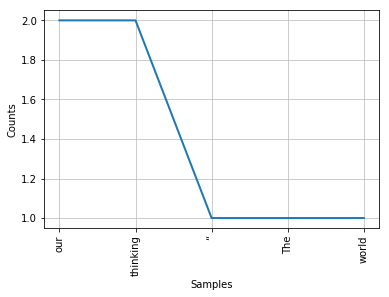

In [19]:
#get top 5 most popular words
freq = nltk.FreqDist(first_quote.words)
freq.plot(5, cumulative=False)

In [20]:
#stemming
stemmer = PorterStemmer() 
word_roots = [stemmer.stem(i) for i in first_quote.words]
print(word_roots)

['“', 'the', 'world', 'as', 'we', 'have', 'creat', 'it', 'is', 'a', 'process', 'of', 'our', 'think', 'It', 'can', 'not', 'be', 'chang', 'without', 'chang', 'our', 'think', '”']


In [21]:
#stopwords and their removal
sw = stopwords.words('english')
first_quote_clean = [i for i in first_quote.words if i not in sw]
print(first_quote.words)
print("\n")
print(first_quote_clean)

['“', 'The', 'world', 'as', 'we', 'have', 'created', 'it', 'is', 'a', 'process', 'of', 'our', 'thinking', 'It', 'can', 'not', 'be', 'changed', 'without', 'changing', 'our', 'thinking', '”']


['“', 'The', 'world', 'created', 'process', 'thinking', 'It', 'changed', 'without', 'changing', 'thinking', '”']


In [22]:
#synonyms, definitions, and examples
syn = wordnet.synsets("honey")
 
print(syn[0].definition())
print(syn[0].examples())

a sweet yellow liquid produced by bees
[]


### Case study - Tert.am newsfeed

Our target is to scrape the newsfeed from the english version of the website and get the most frequent 10 words from there. For that reason, we will request and get the website page, find the paragraphs in newsfeed and extract text. Then the list of headline strings should be concatenated into a single string and chenged to TextBlob type. We will uncapitalize the whole string as well as delete any stopwords. In general, one should probably stem or lemmatize as well, to make sure words like "go" and "going" are considered the same (not done here). Afterwards, we will calculate frequency distribution of all the words in the text and plot top 10 of them.

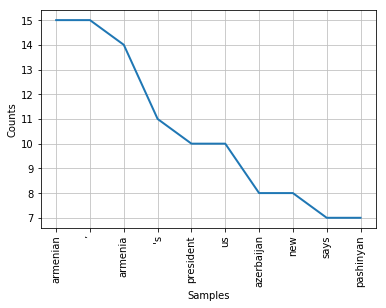

In [23]:
url = "http://www.tert.am/en"
response = requests.get(url)
page = response.content
page = BeautifulSoup(page,"html.parser")
paragraphs = page.find_all("p",class_="today-title")

headlines = [i.get_text() for i in paragraphs]

headline =""
for i in headlines:
    headline = headline + " " + i
    
blob = TextBlob(headline).lower()
clean_headlines = [i for i in blob.words if i not in sw]

freq = nltk.FreqDist(clean_headlines)
freq.plot(10,cumulative=False)